## Preparation and set-up

In [ ]:
#It's for google colab usage on google drive.
#Ignore or change folder path that corresponds to your environment.
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

COLAB_PATH = '/content/drive/My Drive/TIC4003/VaRSpark'

import sys, os
sys.path.append(COLAB_PATH)
print(sys.path)
## change directory to the path above
os.chdir(COLAB_PATH)

Mounted at /content/drive
['', '/tmp/spark-2544bc39-91dc-4ccd-a267-8ac938e72b1e/userFiles-15876720-32b3-449f-93c1-744746192b78', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/TIC4003/VaRSpark', '/content/drive/My Drive/TIC4003/VaRSpark']


In [ ]:
#Installing pyspark
!pip install pyspark

In [ ]:
!pip install investpy

In [ ]:
!pip install stats

     |████████████████████████████████| 133kB 5.5MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-cp37-none-any.whl size=24279 sha256=3abd2d78cf11f4ba873332fb765237348853f354ed5ea1c8dcfd799bd28fcfdc
  Stored in directory: /root/.cache/pip/wheels/1f/64/c9/da1748f4ce76935afc665178ead2217b90147bac5ca096aa56
Successfully built stats


### Import libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from random import choice
import time
from datetime import datetime
import pandas_datareader.data as web
import investpy

import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KernelDensity
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
#import libraries related with pyspark
import os, json, math, pyspark
from pyspark import SparkContext
from pyspark.sql import Row, SparkSession, DataFrame
from pyspark.sql.types import * 
from pyspark.sql.functions import col

## Downloading USA equity market data

While the textbook implemented downloading task of share prices in complecated way, we can obtain share prices easier way by python libraries. It will take very long time to complete the download of all stock prices. So, I just do only once and save those files into parquet form.

In [ ]:
#Obtaining all ticker lists in US stocks.
usstocks_list = investpy.stocks.get_stocks_list(country='united states')

In [ ]:
#Number of US stocks in database
len(usstocks_list)

4582

In [ ]:
#First 10 examples
usstocks_list[:10]

['BA', 'GM', 'CVX', 'C', 'BAC', 'T', 'CAT', 'INTC', 'MSFT', 'AA']

In [ ]:
#Setting start and end in price
start = datetime(2010, 1, 1)
end = datetime(2020,12,31)

In [ ]:
oneprice_df = web.DataReader(usstocks_list[:1000], 'yahoo', start = start, end = end)['Close'].reset_index()
oneprice_df.to_csv('USStockPrices1.csv')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'PDLI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SPAR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ETFC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'NIHD', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CELG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarn

AttributeError: ignored

In [ ]:
oneprice_df.to_parquet("USStockPrices1.parquet")

In [ ]:
twoprice_df = web.DataReader(usstocks_list[1000:2000], 'yahoo', start = start, end = end)['Close'].reset_index()
twoprice_df.to_csv('USStockPrices2.csv')
twoprice_df.to_parquet("USStockPrices2.parquet")

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ENT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'EEI', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ELGX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'EMMS', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FDEF', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarnin

In [ ]:
threeprice_df = web.DataReader(usstocks_list[2000:3000], 'yahoo', start = start, end = end)['Close'].reset_index()
threeprice_df.to_csv('USStockPrices3.csv')
threeprice_df.to_parquet("USStockPrices3.parquet")

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'GCAP', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'KEG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'OBE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AKOa', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BGG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning

In [ ]:
fourprice_df = web.DataReader(usstocks_list[3000:4000], 'yahoo', start = start, end = end)['Close'].reset_index()
fourprice_df.to_csv('USStockPrices4.csv')
fourprice_df.to_parquet("USStockPrices4.parquet")

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LM', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BPR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CBL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'SNH', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'PTLA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: 

In [ ]:
fiveprice_df = web.DataReader(usstocks_list[4000:], 'yahoo', start = start, end = end)['Close'].reset_index()
fiveprice_df.to_csv('USStockPrices5.csv')
fiveprice_df.to_parquet("USStockPrices5.parquet")

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'EDNT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'WRTC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'LK', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'PNRL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AFH', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning

## Downloading 4 factor data

While the textbook downloads factor data both from yahoo finance and investing.com and write code to obtain last prices from each different data format, now we can download all factor data including S&P500, Nasdaq, 30 year treasury yield, and WTI oil future price from yahoo finance. So I just download all data from yahoo finance.

In [ ]:
factors_list = ['^GSPC', '^IXIC', '^TYX', 'BZ=F']
factors_df = web.DataReader(factors_list, 'yahoo', start = start, end = end)['Close'].reset_index()
factors_df.to_csv('Factors.csv')
factors_df.to_parquet("Factors.parquet")

## Read stock price and factor data from csv files

After download stock price data, I just read data from csv files.

In [ ]:
price1_df = pd.read_csv('USStockPrices1.csv')
price2_df = pd.read_csv('USStockPrices2.csv')
price3_df = pd.read_csv('USStockPrices3.csv')
price4_df = pd.read_csv('USStockPrices4.csv')
price5_df = pd.read_csv('USStockPrices5.csv')

In [ ]:
del price1_df['Unnamed: 0']
del price2_df['Unnamed: 0']
del price3_df['Unnamed: 0']
del price4_df['Unnamed: 0']
del price5_df['Unnamed: 0']

In [ ]:
price_df = price1_df.merge(price2_df, how='outer', on='Date')
price_df = price_df.merge(price3_df, how='outer', on='Date')
price_df = price_df.merge(price4_df, how='outer', on='Date')
price_df = price_df.merge(price5_df, how='outer', on='Date')

In [ ]:
price_df.head()

,Date,BA,GM,CVX,C,BAC,T,CAT,INTC,MSFT,AA,F,EBAY,DELL,DIS,DOW,CSCO,DE,FDX,GIS,GLW,GT,GS,JPM,KMB,KHC,KO,MCD,LLY,ORCL,MRK,MSI,MMM,ODP,CAKFF,PMMAF,VRTX,MNST,TEVA,FITB,...,HTZ,APY,ISCA,BKS,VSI,FTDCQ,CLDPQ,BRSWQ,PES,UNT,ERA,LION,LTXB,FNBCQ,DPLO,QHC,LABL,NCI,CGIP,WAGE,RTEC,TYPE,CHL,WUBA,FIT,BT,TI,SBGL,GHDX,CHSP,WLH,CTRL,CRCM,NEWM,FSB,CJ,GTX,FREDQ,HF,DLPH
0,2010-01-04,56.180000,NaN,79.059998,34.000000,15.690000,28.580000,58.549999,20.879999,30.950001,40.009949,10.28,10.058923,NaN,32.070000,NaN,24.690001,56.060001,83.449997,35.450001,19.559999,14.79,173.080002,42.849998,61.620327,NaN,28.520000,62.779999,35.820000,24.850000,37.009998,32.218723,83.019997,64.500000,25.200001,NaN,44.240002,6.546667,57.880001,10.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,58.020000,NaN,79.620003,35.299999,16.200001,28.440001,59.250000,20.870001,30.959999,38.760391,10.96,9.953704,NaN,31.990000,NaN,24.580000,55.849998,84.540001,35.119999,19.629999,15.75,176.139999,43.680000,61.668266,NaN,28.174999,62.299999,35.189999,24.820000,37.160000,31.774050,82.500000,67.599998,25.200001,NaN,42.779999,6.571667,57.060001,10.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,59.779999,NaN,79.629997,36.400002,16.389999,27.610001,59.430000,20.799999,30.770000,40.778912,11.37,9.890572,NaN,31.820000,NaN,24.420000,55.700001,83.839996,35.330002,19.379999,15.83,174.259995,43.919998,60.910835,NaN,28.165001,61.450001,35.450001,24.459999,37.660000,32.218723,83.669998,66.099998,25.200001,NaN,42.029999,6.708333,57.200001,10.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,62.200001,NaN,79.330002,36.500000,16.930000,27.299999,59.669998,20.600000,30.450001,39.913830,11.66,9.776936,NaN,31.830000,NaN,24.530001,56.099998,82.930000,35.650002,19.570000,15.61,177.669998,44.790001,60.508148,NaN,28.094999,61.900002,35.270000,24.379999,37.720001,32.865524,83.730003,69.800003,25.200001,NaN,41.500000,6.681667,56.840000,11.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,61.599998,NaN,79.470001,35.900002,16.780001,27.100000,60.340000,20.830000,30.660000,40.899059,11.69,9.894781,NaN,31.879999,NaN,24.660000,57.630001,84.989998,35.360001,19.889999,15.94,174.309998,44.680000,60.124641,NaN,27.575001,61.840000,35.000000,24.680000,37.700001,31.369801,84.320000,70.599998,25.200001,NaN,40.669998,6.715000,59.340000,11.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
factor_df = pd.read_csv('Factors.csv')
del factor_df['Unnamed: 0']

In [ ]:
factor_df.head()

,Date,^GSPC,^IXIC,^TYX,BZ=F
0,2010-01-04,1132.989990,2308.419922,4.660,80.120003
1,2010-01-05,1136.520020,2308.709961,4.593,80.589996
2,2010-01-06,1137.140015,2301.090088,4.671,81.889999
3,2010-01-07,1141.689941,2300.050049,4.689,81.510002
4,2010-01-08,1144.979980,2317.169922,4.695,81.370003


## Data Clearning

Same as is in the textbook, I implemented data cleaning, such as eliminating stocks with less than 5 years of data, implementing ffill, then calculating rolling 2 weeks returns. While in the textbook, data cleaning is implemented by writing tedious codes, now we can implement data cleaning by Python's pandas very easily, such that I'll do so with pandas.

In [ ]:
#eliminating stocks with many nan
price_df = price_df.dropna(thresh=260*5, axis=1)
#change datetype of Date
price_df['Date'] = price_df['Date'].astype("datetime64")
factor_df['Date'] = factor_df['Date'].astype("datetime64")

In [ ]:
#Remain data only after 2016/1/1
price_df = price_df[price_df['Date'] >= datetime(2016,1,1)]
factor_df = factor_df[factor_df['Date'] >= datetime(2016,1,1)]

In [ ]:
#Set date as index, then executing ffill (if no price is available, 
#just filling by previous price data)
price_df = price_df.set_index('Date')
price_df = price_df.fillna(method='ffill')

factor_df = factor_df.set_index('Date')
factor_df = factor_df.fillna(method='ffill')

In [ ]:
price_df.head()

,BA,GM,CVX,C,BAC,T,CAT,INTC,MSFT,AA,F,EBAY,DIS,CSCO,DE,FDX,GIS,GLW,GT,GS,JPM,KMB,KHC,KO,MCD,LLY,ORCL,MRK,MSI,MMM,ODP,CAKFF,PMMAF,VRTX,MNST,TEVA,FITB,SHLDQ,CTAS,ADSK,...,DB,MT,UL,YPF,TRI,TLK,ENB,MFC,RY,MBT,SA,UHT,UBA,USNA,WSR,LMAT,CDR,WNC,FOE,NEO,TPRE,AHH,EVTC,RMAX,NBHC,MMI,PARR,CCS,BOOT,SHAK,DEA,IRT,REI_y,NSA,CHCT,GNL,LNTH,GATX,MTDR,GMED
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,140.500000,33.310001,88.849998,51.130001,16.43,34.349998,67.989998,33.990002,54.799999,23.333130,13.97,26.430000,102.980003,26.410000,76.080002,143.429993,57.459999,17.91,32.009998,177.139999,63.619999,126.480003,72.699997,42.400002,117.580002,82.870003,35.750000,52.480000,67.129997,146.820007,54.900002,27.27,22.049999,122.889999,48.113335,65.300003,19.549999,19.790001,88.290001,60.310001,...,23.490000,12.12,42.200001,15.80,37.110001,22.315001,32.900002,14.65,52.400002,6.01,8.80,48.840000,18.799999,63.605000,11.74,15.820000,45.033112,11.93,10.75,7.56,12.95,10.39,16.43,36.520000,20.900000,27.730000,23.100000,17.020000,12.50,38.549999,16.809999,7.48,6.83,16.780001,18.480000,23.969999,3.28,42.220001,19.340000,26.709999
2016-01-05,141.070007,32.430000,89.610001,50.860001,16.43,34.590000,67.279999,33.830002,55.049999,22.275810,13.72,26.120001,100.900002,26.290001,76.519997,144.649994,57.200001,17.90,30.700001,174.089996,63.730000,129.080002,73.389999,42.549999,119.199997,84.110001,35.639999,53.150002,66.389999,147.460007,57.799999,27.27,22.049999,123.449997,48.689999,65.860001,19.610001,19.950001,88.430000,60.389999,...,23.480000,12.78,42.099998,15.73,37.040001,23.080000,32.889999,14.43,52.070000,6.03,8.71,50.330002,19.120001,62.900002,12.00,16.219999,46.423840,11.77,10.58,7.24,12.78,10.67,16.17,36.540001,21.049999,27.889999,24.000000,17.049999,12.30,39.009998,17.510000,7.46,6.72,17.100000,18.480000,23.790001,3.21,40.380001,18.820000,27.070000
2016-01-06,138.830002,31.270000,86.070000,50.119999,16.08,34.060001,66.220001,33.080002,54.049999,20.689831,13.11,26.410000,100.360001,26.010000,75.660004,140.770004,56.730000,17.50,30.350000,169.839996,62.810001,129.020004,73.529999,42.320000,118.400002,83.580002,35.820000,52.419998,65.430000,144.490005,57.099998,27.27,22.049999,122.230003,48.766666,64.959999,19.320000,19.020000,88.029999,59.540001,...,23.139999,11.73,41.500000,14.98,37.009998,22.945000,31.670000,14.01,50.840000,5.76,9.14,51.070000,19.450001,63.084999,12.08,16.440001,46.754967,11.57,10.05,7.07,12.49,10.64,16.17,36.360001,21.080000,27.590000,23.790001,15.990000,11.46,38.330002,17.559999,7.50,5.56,17.530001,18.469999,23.280001,3.14,39.509998,17.290001,27.590000
2016-01-07,133.009995,29.990000,83.019997,47.560001,15.50,33.509998,63.939999,31.840000,52.169998,19.872810,12.70,25.690001,99.500000,25.410000,74.989998,134.589996,55.110001,17.10,28.709999,164.619995,60.270000,126.860001,71.900002,41.619999,115.660004,81.410004,35.040001,51.959999,64.110001,140.970001,56.500000,27.27,22.049999,114.959999,48.400002,64.489998,18.709999,18.360001,86.879997,55.980000,...,22.719999,11.19,40.849998,14.74,35.290001,22.520000,31.000000,13.38,49.869999,5.37,9.36,49.799999,19.100000,61.650002,11.58,15.370000,45.496689,10.92,9.52,6.85,12.00,10.52,15.82,35.730000,20.920000,26.389999,23.610001,15.600000,11.52,36.200001,17.580000,7.32,5.03,17.350000,18.190001,22.410000,3.07,37.740002,15.910000,26.270000
2016-01-08,129.990005,29.530001,82.129997,46.130001,15.20,33.540001,63.290001,31.510000,52.330002,19.392210,12.54,25.750000,99.250000,24.780001,73.760002,134.710007,55.290001,17.15,28.139999,163.940002,58.919998,125.230003,71.180000,41.509998,115.480003,81.250000,34.650002,51.080002,64.250000,140.490005,53.500000,27.27,22.049999,110.709999,48.083332,63.700001,18.389999,18.030001,84.629997,55.060001,...,22.100000,10.32,40.450001,14.65,35.540001,22.160000,31.709999,13.43,49.480000,5.22,8.96,49.169998,18.790001,59.500000,11.40,15.090000,44.834438,10.79,9.61,6.92,11.72,10.47,15.47,34.709999,20.299999,26.000000,23.719999,15.1

In [ ]:
#Calculating rolling return of 2 weeks (10 business days)
weeks2ret_stocks_df = price_df.pct_change(10)
weeks2ret_factors_df = factor_df.pct_change(10)
#Eliminating many nan rows
weeks2ret_stocks_df = weeks2ret_stocks_df.dropna(thresh=1000, axis=0)
weeks2ret_factors_df = weeks2ret_factors_df.dropna(thresh=4, axis=0)
#Datatype handling
weeks2ret_stocks_df = weeks2ret_stocks_df.astype('float')
weeks2ret_factors_df = weeks2ret_factors_df.astype('float')

In [ ]:
weeks2ret_stocks_df.head()

,BA,GM,CVX,C,BAC,T,CAT,INTC,MSFT,AA,F,EBAY,DIS,CSCO,DE,FDX,GIS,GLW,GT,GS,JPM,KMB,KHC,KO,MCD,LLY,ORCL,MRK,MSI,MMM,ODP,CAKFF,PMMAF,VRTX,MNST,TEVA,FITB,SHLDQ,CTAS,ADSK,...,DB,MT,UL,YPF,TRI,TLK,ENB,MFC,RY,MBT,SA,UHT,UBA,USNA,WSR,LMAT,CDR,WNC,FOE,NEO,TPRE,AHH,EVTC,RMAX,NBHC,MMI,PARR,CCS,BOOT,SHAK,DEA,IRT,REI_y,NSA,CHCT,GNL,LNTH,GATX,MTDR,GMED
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-19,-0.102776,-0.117382,-0.082611,-0.179738,-0.133293,0.004658,-0.131784,-0.123272,-0.077372,-0.305870,-0.144596,-0.024972,-0.087493,-0.096933,-0.047582,-0.113156,-0.035503,-0.064210,-0.138707,-0.114711,-0.103898,-0.004744,-0.034801,-0.011321,-0.000680,0.004344,-0.033566,-0.021723,-0.089379,-0.057417,-0.081967,0.0,-0.060726,-0.227032,0.002910,-0.049158,-0.136573,-0.149065,-0.054253,-0.210910,...,-0.130694,-0.123762,-0.012559,-0.132911,-0.045810,-0.000224,-0.079635,-0.154949,-0.116603,-0.083195,-0.343182,-0.011466,0.021277,-0.066190,-0.111584,-0.039823,-0.008824,-0.149204,-0.170233,-0.097884,-0.134363,-0.006737,-0.122946,-0.040800,-0.093301,-0.149297,-0.042424,-0.136898,-0.467200,-0.130999,0.026175,-0.104278,-0.335286,-0.004172,-0.103355,-0.170213,-0.277439,-0.168167,-0.349535,-0.067016
2016-01-20,-0.134189,-0.092815,-0.118625,-0.203893,-0.166768,-0.019948,-0.125892,-0.125333,-0.077384,-0.272923,-0.132653,-0.011485,-0.082854,-0.128946,-0.059069,-0.148427,-0.046154,-0.067598,-0.090228,-0.116836,-0.128982,-0.041757,-0.030249,-0.027497,-0.028691,-0.017715,-0.047699,-0.048918,-0.090827,-0.071206,-0.157439,0.0,-0.060726,-0.214338,-0.041418,-0.060431,-0.157063,-0.158396,-0.068868,-0.206822,...,-0.176746,-0.199531,-0.031829,-0.184361,-0.053186,-0.032279,-0.135299,-0.150381,-0.130786,-0.089552,-0.331803,-0.060401,-0.019875,-0.042289,-0.175000,-0.058570,-0.048502,-0.116398,-0.158790,-0.034530,-0.103286,-0.054358,-0.097712,-0.081828,-0.098337,-0.144138,-0.079583,-0.164223,-0.509756,-0.134837,-0.052541,-0.079088,-0.257440,-0.036842,-0.113636,-0.165195,-0.242991,-0.111194,-0.292774,-0.075730
2016-01-21,-0.111143,-0.055005,-0.058325,-0.198923,-0.169154,0.014093,-0.098611,-0.103386,-0.066050,-0.176539,-0.083905,-0.012117,-0.063173,-0.119569,-0.034761,-0.122185,-0.046007,-0.032571,-0.080066,-0.107101,-0.120363,-0.031546,-0.006528,-0.021975,-0.004730,-0.026083,-0.047460,-0.028615,-0.070457,-0.046578,-0.115587,0.0,-0.060726,-0.222204,-0.056596,-0.045720,-0.185818,-0.105152,-0.087470,-0.196003,...,-0.197061,-0.092072,-0.007229,-0.100134,-0.034855,-0.022663,-0.012946,-0.087081,-0.080055,-0.006945,-0.349015,-0.065205,-0.027764,-0.039788,-0.163907,-0.125304,-0.063739,-0.108038,-0.124378,-0.025460,-0.086469,-0.041353,-0.104515,-0.107811,-0.114801,-0.134469,-0.036570,-0.111320,-0.424084,-0.084529,-0.058656,-0.092000,-0.086331,-0.069025,-0.094207,-0.128866,-0.222930,-0.039737,-0.191440,-0.099674
2016-01-22,-0.063153,-0.023675,0.006264,-0.136669,-0.125161,0.048642,-0.046293,-0.059987,0.002300,-0.169287,-0.044094,0.028805,-0.026131,-0.080283,-0.005067,-0.052233,0.003992,0.000000,-0.007663,-0.047139,-0.055085,-0.001104,0.034631,0.010572,0.023690,0.013143,-0.006849,-0.011740,-0.032288,-0.010286,-0.102655,0.0,-0.060726,-0.176148,-0.007163,-0.019073,-0.148049,-0.017974,-0.051105,-0.124151,...,-0.161092,-0.042895,0.034517,-0.000678,0.034571,0.039076,0.079032,-0.011958,-0.018047,0.148976,-0.365385,-0.011044,0.019372,0.016626,-0.095855,-0.053351,0.000000,-0.028388,-0.023109,0.014599,-0.025833,0.000000,-0.073957,-0.095998,-0.094168,-0.079197,0.013977,-0.058333,-0.409722,-0.018785,-0.036974,-0.060109,0.027833,-0.035159,-0.041781,-0.068273,-0.153094,0.028617,-0.083595,-0.036163
2016-01-25,-0.046004,-0.010159,-0.015098,-0.142640,-0.147368,0.043530,-0.085006,-0.060616,-0.010319,-0.157373,-0.044657,0.015146,-0.039899,-0.064972,-0.026844,-0.064361,-0.008862,-0.022740,-0.011727,-0.078199,-0.055329,-0.020283,0.040039,0.015659,0.032213,0.005662,-0.008947,-0.003132,-0.028483,-0.020784,-0.072897,0.0,-0.060726,-0.167916,-0.028839,-0.008320,-0.18379

In [ ]:
weeks2ret_factors_df.head()

,^GSPC,^IXIC,^TYX,BZ=F
Date,,,,
2016-01-19,-0.065252,-0.086912,-0.062207,-0.227297
2016-01-20,-0.078038,-0.085811,-0.084357,-0.234487
2016-01-21,-0.060932,-0.075210,-0.048639,-0.145486
2016-01-22,-0.018625,-0.020951,-0.036227,-0.046519
2016-01-25,-0.023387,-0.026949,-0.040411,-0.090909


## Plotting factor returns data

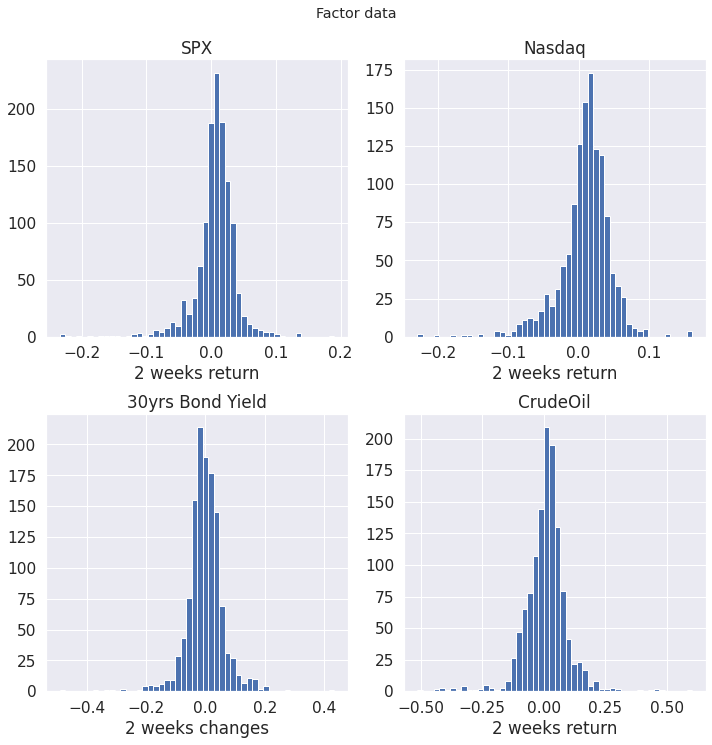

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle("Factor data", fontsize="x-large", y=1.03)

plt.subplot(2,2,1)
plt.hist(data=weeks2ret_factors_df, x='^GSPC', bins=50)
plt.title("SPX")
plt.xlabel("2 weeks return")

plt.subplot(2,2,2)
plt.hist(data=weeks2ret_factors_df, x='^IXIC', bins=50)
plt.title("Nasdaq")
plt.xlabel("2 weeks return")

plt.subplot(2,2,3)
plt.hist(data=weeks2ret_factors_df, x='^TYX', bins=50)
plt.title("30yrs Bond Yield")
plt.xlabel("2 weeks changes")

plt.subplot(2,2,4)
plt.hist(data=weeks2ret_factors_df, x='BZ=F', bins=50)
plt.title("CrudeOil")
plt.xlabel("2 weeks return")


plt.tight_layout()
plt.show()

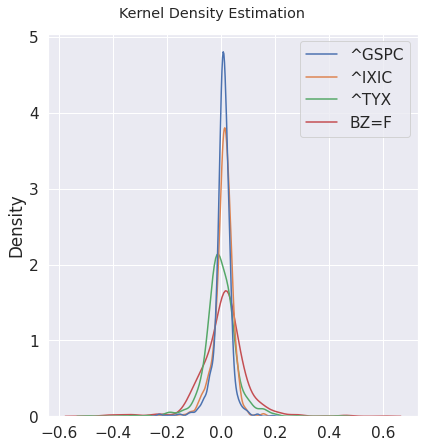

In [ ]:
#Python has kernel density estimation function too.
plt.figure(figsize=(6,6))
plt.suptitle("Kernel Density Estimation", fontsize="x-large", y=1.03)
sns.kdeplot(data=weeks2ret_factors_df)
plt.tight_layout()
plt.show()

## Creating linear model to forecast 2 weeks returns of each stocks by 2 weeks returns of 4 factors.

In [ ]:
#Adding square of factors in explanatory variables
w2ret_factors_sq_df = weeks2ret_factors_df.apply(lambda x: x**2)
w2ret_factors_sq_df.columns = ['^GSPC_sq','^IXIC_sq','^TYX_sq','BZ=F_sq']

#Adding sqrt of factors
w2ret_factors_sqrt_df = weeks2ret_factors_df.apply(lambda x: np.sqrt(abs(x)))
w2ret_factors_sqrt_df.columns = ['^GSPC_sqrt','^IXIC_sqrt','^TYX_sqrt','BZ=F_sqrt']

#Aggregating all factors into one DataFrame
w2ret_allfactors = weeks2ret_factors_df.merge(w2ret_factors_sq_df, on='Date',how='inner')
w2ret_allfactors = w2ret_allfactors.merge(w2ret_factors_sqrt_df, on='Date',how='inner')

In [ ]:
w2ret_allfactors.head()

,^GSPC,^IXIC,^TYX,BZ=F,^GSPC_sq,^IXIC_sq,^TYX_sq,BZ=F_sq,^GSPC_sqrt,^IXIC_sqrt,^TYX_sqrt,BZ=F_sqrt
Date,,,,,,,,,,,,
2016-01-19,-0.065252,-0.086912,-0.062207,-0.227297,0.004258,0.007554,0.003870,0.051664,0.255445,0.294809,0.249414,0.476757
2016-01-20,-0.078038,-0.085811,-0.084357,-0.234487,0.006090,0.007364,0.007116,0.054984,0.279353,0.292936,0.290443,0.484238
2016-01-21,-0.060932,-0.075210,-0.048639,-0.145486,0.003713,0.005657,0.002366,0.021166,0.246844,0.274245,0.220544,0.381427
2016-01-22,-0.018625,-0.020951,-0.036227,-0.046519,0.000347,0.000439,0.001312,0.002164,0.136473,0.144746,0.190334,0.215682
2016-01-25,-0.023387,-0.026949,-0.040411,-0.090909,0.000547,0.000726,0.001633,0.008264,0.152927,0.164161,0.201025,0.301511


In [ ]:
#Setting linear regression, using sklearn.
model = LinearRegression()

In [ ]:
#Applying linear regression to all stocks.
#X=factors, y=2 weeks return of each stocks
X = w2ret_allfactors

coef_df = pd.DataFrame()
for i, column in enumerate(range(len(weeks2ret_stocks_df.columns))):

  y = weeks2ret_stocks_df.iloc[:,column]
  model.fit(X, y)
  temp_df = pd.DataFrame(model.coef_).T
  temp_df.index = [weeks2ret_stocks_df.columns[column]]

  if i == 0:
    coef_df = temp_df
  else:
    coef_df = pd.concat([coef_df,temp_df],axis=0)

In [ ]:
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11
BA,2.901140,-1.249744,0.054072,0.116423,-0.284234,-1.510130,0.626110,-0.984830,-0.013369,0.028272,-0.009449,0.133788
GM,1.961912,-0.763928,0.233488,-0.003479,-6.646370,3.528938,0.371739,-0.369957,0.171744,-0.011239,-0.011707,0.093222
CVX,2.880590,-1.584723,-0.072042,0.134418,1.311845,-1.290322,0.310120,0.004078,-0.014683,-0.015733,-0.015786,0.059034
C,2.307242,-0.772437,0.275147,0.011889,-1.200560,-0.114936,0.525930,-0.470427,0.026701,-0.051292,-0.034385,0.109581
BAC,2.183575,-0.832467,0.418679,-0.049976,1.041589,-1.127714,0.204302,-0.292047,0.060739,-0.077514,-0.032918,0.070355
...,...,...,...,...,...,...,...,...,...,...,...,...
GNL,1.486026,-0.473579,-0.095351,0.075020,-6.634943,3.891933,0.513712,-0.310448,-0.012180,0.070758,0.008319,0.030911
LNTH,2.025671,-0.563422,-0.073968,0.076320,-1.034435,4.467082,1.265872,-0.470280,-0.320173,0.012232,-0.059728,0.067528
GATX,1.957018,-0.989932,0.173299,0.052216,1.496241,-3.707813,0.340679,-0.191810,0.126274,-0.057006,0.019134,0.060016
MTDR,1.736887,0.214084,0.198410,0.540483,-8.888045,0.048842,0.499123,0.973375,-0.017734,0.085740,0.044135,0.186336


Text(0.5, 1.0, 'Correlation among factors')

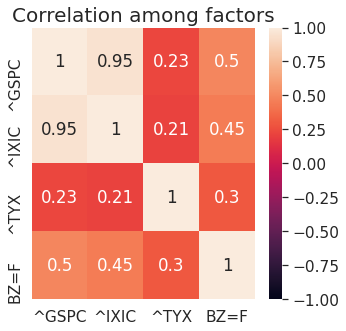

In [ ]:
#Checking factor correlation. Very high correlation between SPX and Nasdaq.
factor_corr = weeks2ret_factors_df.corr()

fig, axs = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(factor_corr,vmin=-1,vmax=1,annot=True, ax=axs).set_title("Correlation among factors", size=20)

## Applying Multivariate Normal Distribution for factor sampling

In [ ]:
#Calculating factor mean and covariance
factor_mean = weeks2ret_factors_df.mean()
factor_cov = weeks2ret_factors_df.cov()

In [ ]:
factor_mean

^GSPC    0.005773
^IXIC    0.008776
^TYX    -0.002426
BZ=F     0.007800
dtype: float64

In [ ]:
factor_cov

,^GSPC,^IXIC,^TYX,BZ=F
^GSPC,0.001099,0.001155,0.000468,0.001481
^IXIC,0.001155,0.001357,0.000483,0.001482
^TYX,0.000468,0.000483,0.003830,0.001667
BZ=F,0.001481,0.001482,0.001667,0.008091


In [ ]:
#create numpy array
coef_np = np.array(coef_df)
factor_mean_np = np.array(factor_mean)
factor_cov_np = np.array(factor_cov)

In [ ]:
#Applying multivariate normal distribution
trial_factor_return = np.random.multivariate_normal(factor_mean_np.T, factor_cov_np).tolist()
#Then, square and sqrt for all factor returns.
trial_factor_return_sq = [i ** 2 for i in trial_factor_return]
trial_factor_return_sqrt = [np.sqrt(abs(i)) for i in trial_factor_return]
#All factor return
trial_factor_return_final = trial_factor_return + trial_factor_return_sq + trial_factor_return_sqrt
trial_factor_return_final

[0.009026855696413698,
 -0.0007975860149151241,
 0.05564154282015857,
 0.026176127020949288,
 8.148412376387642e-05,
 6.361434511881886e-07,
 0.0030959812874075394,
 0.0006851896258168714,
 0.09500976632122457,
 0.028241565376500008,
 0.23588459640289902,
 0.16179037987763453]

In [ ]:
#calculating all stocks return in 1 trial
return_calc = lambda x: np.matmul(x, trial_factor_return_final)
trial_returns2 = return_calc(coef_np)
#mean is portfolio return under equal weight assumption
port_return_onetrial2 = trial_returns2.mean()
port_return_onetrial2

0.03533607234084375

In [ ]:
#(Cross check by pandas)
#calculating all stocks return in 1 trial
trial_returns = coef_df.apply(lambda x: np.matmul(x, trial_factor_return_final), axis=1)
#mean is portfolio return under equal weight assumption
port_return_onetrial = trial_returns.mean()
port_return_onetrial

0.03533607234084379

In [ ]:
#Creating function to execute all above functions
def trial_returns(seed, num_trials, coef_np, factor_mean_np, factor_cov_np):

  np.random.seed(seed)
  trial_return_list = []

  for i in range(int(num_trials)):
    #Applying multivariate normal distribution
    trial_factor_return = np.random.multivariate_normal(factor_mean_np.T, factor_cov_np).tolist()
    #Then, square and sqrt for all factor returns.
    trial_factor_return_sq = [i ** 2 for i in trial_factor_return]
    trial_factor_return_sqrt = [np.sqrt(abs(i)) for i in trial_factor_return]
    #All factor return
    trial_factor_return_final = trial_factor_return + trial_factor_return_sq + trial_factor_return_sqrt

    #calculating all stocks return in 1 trial
    return_calc = lambda x: np.matmul(x, trial_factor_return_final)
    trial_returns = return_calc(coef_np)
    #mean is portfolio return under equal weight assumption
    port_return_onetrial = trial_returns.mean()

    #Acquire one trial of portfolio return for all stocks 
    trial_return_list.append(port_return_onetrial)

  return trial_return_list

In [ ]:
trial_returns(1496, 10, coef_np, factor_mean_np, factor_cov_np)

[0.042328206965411834,
 0.03872848597239522,
 -0.007297599779707583,
 0.0010729350233618091,
 -0.00886247607800957,
 0.03928387668266898,
 0.005212700620769099,
 -0.03890695676005431,
 0.06825954179887947,
 0.05592905614714472]

In [ ]:
#Save coef_df, factor_mean, and factor_cov as csv file.
coef_df.to_csv("coef_np.csv", header=False, index=False)
factor_mean.to_csv("factor_mean_np.csv", header=False, index=False)
factor_cov.to_csv("factor_cov_np.csv", header=False, index=False)

## Applying PySpark to implement monte carlo simulation with many trials

In [ ]:
#Base setting for num of trials, parallelism, and random seed
ntrials = 1000000
parallelism = 100
base_seed = 42

In [ ]:
#Start session
session = SparkSession.builder.appName("VaR").getOrCreate()
sc = session.sparkContext

#For csv reading
dataFrameReader = session.read

In [ ]:
#Get np.array data 
coef_np2 = dataFrameReader\
            .option("header", "false") \
            .option("inferSchema", value = True) \
            .csv('coef_np.csv')

factor_mean_np2 = dataFrameReader\
            .option("header", "false") \
            .option("inferSchema", value = True) \
            .csv('factor_mean_np.csv')

factor_cov_np2 = dataFrameReader\
            .option("header", "false") \
            .option("inferSchema", value = True) \
            .csv('factor_cov_np.csv')

In [ ]:
#collect each data
coef_np3 = coef_np2.collect()
factor_mean_np3 = factor_mean_np2.collect()
factor_cov_np3 = factor_cov_np2.collect()

In [ ]:
def coefConvert(coef_collected):
  total_list = []
  for i in range(int(len(coef_collected))):
    one_row =  coef_collected[i]
    one_row_list = []
    for j in range(int(len(one_row))):
      one_row_list.append(one_row[j])

    total_list.append(one_row_list)
  
  return np.array(total_list)

In [ ]:
def meancovConvert(meancov_collected):
  total_list = []
  for i in range(int(len(meancov_collected))):
    one_row =  meancov_collected[i]
    total_list.append(one_row)
  
  return np.array(total_list)

In [ ]:
#converting Spark SQL Dataframe into numpy array
coef_np4 = coefConvert(coef_np3)
factor_mean_np4 = meancovConvert(factor_mean_np3).flatten()
factor_cov_np4 = meancovConvert(factor_cov_np3)

In [ ]:
seeds = range(base_seed, base_seed + parallelism)
seed_rdd = sc.parallelize(seeds, parallelism)
trials = seed_rdd.flatMap(lambda seed: trial_returns(seed, ntrials / parallelism, coef_np4, factor_mean_np4, factor_cov_np4))
trials.cache()
trials_list = trials.collect()

In [ ]:
trials.saveAsTextFile("trials.text")

## Finding VaR and CVaR, and implementing visualization of results.

In [ ]:
load_trials = sc.textFile('trials')

In [ ]:
trials_list2 = load_trials.collect()

In [ ]:
len(trials_list2)

1000000

In [ ]:
#Convert list into dataframe, then change data type as float
trials_df = pd.DataFrame(trials_list2)
trials_df.columns = ['simulatedPortRet']
trials_df['simulatedPortRet'] = trials_df['simulatedPortRet'].astype('float')

<Figure size 432x432 with 0 Axes>

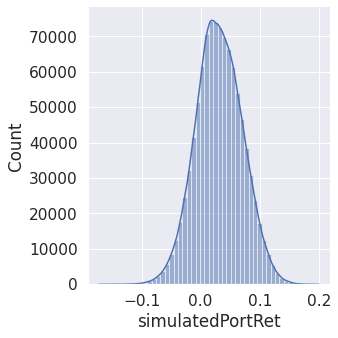

In [ ]:
#Python has kernel density estimation function too.
plt.figure(figsize=(6,6))
sns.displot(data=trials_df, x='simulatedPortRet', kde=True, bins=50)
plt.tight_layout()
plt.show()

In [ ]:
#VaR
def fivepercent_VaR(trials_list):
    sorted_trials_list = sorted(trials_list)
    top_losses = sorted_trials_list[:int(len(trials_list)/20)]
    return top_losses[-1]

In [ ]:
#CVaR
def fivepercent_CVaR(trials_list):
    sorted_trials_list = sorted(trials_list)
    top_losses = sorted_trials_list[:int(len(trials_list)/20)]
    return sum(top_losses) / len(top_losses)

In [ ]:
#Confidence interval of VaR by bootstrapping
def confidence_interval(trials_list, f, resample, p):
    stats = sorted(map(lambda i: f(np.random.choice(trials_list, len(trials_list), True)), range(0, resample)))
    lower = int(resample * p / 2 - 1)
    upper = int(math.ceil(resample * (1 - p / 2)))
    return (stats[lower], stats[upper])

In [ ]:
var5 = fivepercent_VaR(np.array(trials_df['simulatedPortRet']))
var5

-0.032267631604817035

In [ ]:
cvar5 = fivepercent_CVaR(np.array(trials_df['simulatedPortRet']))
cvar5

-0.04912366051882793

In [ ]:
confidence_interval(np.array(trials_df['simulatedPortRet']), fivepercent_VaR, 100, 0.05)

(-0.03242938886893313, -0.03211481857760984)

In [ ]:
confidence_interval(np.array(trials_df['simulatedPortRet']), fivepercent_CVaR, 100, 0.05)

(-0.04936747552736489, -0.04894447809805584)

### Checking Kupiec test

In [ ]:
past_returns = weeks2ret_stocks_df.mean(axis=1)
past_returns.head()

Date
2016-01-19   -0.101956
2016-01-20   -0.107806
2016-01-21   -0.089394
2016-01-22   -0.043224
2016-01-25   -0.047470
dtype: float64

In [ ]:
def countFailures(stocksReturns, valueAtRisk):
    failures = 0
    for i in range(0, len(stocksReturns)):
        loss = past_returns[i]
        if(loss < valueAtRisk):
            failures += 1
    return failures

In [ ]:
failures = countFailures(past_returns, var5)
failures

111

In [ ]:
def kupiecTestStatistic(total, failures, p):
    failureRatio = float(failures)/ total
    logNumer = (total - failures) * math.log1p(-p) + failures * math.log(p)
    logDenom = (total - failures) * math.log1p(-failureRatio) + failures * math.log(failureRatio)
    return -2 * (logNumer - logDenom)

In [ ]:
kupiecTestStatistic(len(past_returns), failures, 0.05)

32.600580178660834

In [ ]:
def kupiecTestPValue(stocksReturns, valueAtRisk, p):
    failures = countFailures(stocksReturns, valueAtRisk)
    total = len(stocksReturns)
    testStatistic = kupiecTestStatistic(total, failures, p)
    return 1 - st.chi2.cdf(testStatistic, 1)

In [ ]:
print("Kupiec test p-value: {0}".format(kupiecTestPValue(past_returns, var5, 0.05)))

Kupiec test p-value: 1.1318095904933045e-08
